## A1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

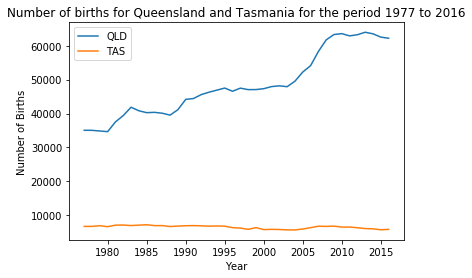

In [2]:
#1.a
births = pd.read_csv('Datasets/Task A/Births.csv')
plt.plot(births.Year, births.QLD, births.Year, births.TAS)
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of births for Queensland and Tasmania for the period 1977 to 2016')
plt.legend(['QLD','TAS'], loc='best')
plt.show()

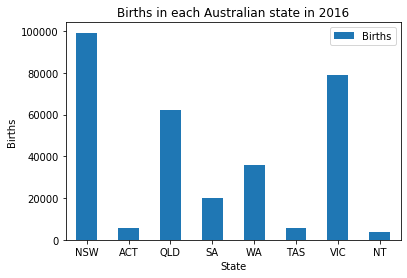

In [3]:
#1.b
condition1 = births['Year']==2016
q1b = births[condition1]
q1b = pd.melt(q1b, value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q1b.rename(columns = {'value':'Births'}, inplace = True)
ax = q1b.plot.bar(x = 'State',y = 'Births', rot = 0, label = 'Births')
plt.title('Births in each Australian state in 2016')
plt.xlabel('State')
plt.ylabel('Births')
plt.show()

/Users/linch/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


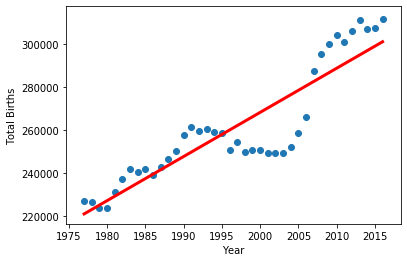

In [4]:
#2
q2 = pd.melt(births, id_vars = ['Year'], value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q2.rename(columns = {'value': 'Births'}, inplace = True)
fun1 = {'Births':{'Total Birth': 'sum'}}
q2 = q2.groupby('Year').agg(fun1)
q2 = q2.reset_index()
q2.columns = q2.columns.droplevel(0)
q2.rename(columns = {'':'Year'}, inplace = True)

#2.a

slope, intercept, r_value, p_value, std_err = linregress(q2['Year'],q2['Total Birth'])
line = [slope*xi + intercept for xi in q2['Year']]
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.plot(q2['Year'], line, 'r-', linewidth = 3)
plt.scatter(q2['Year'], q2['Total Birth'])
plt.show()


In [5]:
#2.b
#The period of 1995 to 2005 is in an unusual trend that can be seen
#from the figure above

In [6]:
#2.c
birth1 = int(slope * 2050 + intercept)
birth2 = int(slope * 2100 + intercept)
print(birth1,birth2)

370945 473754


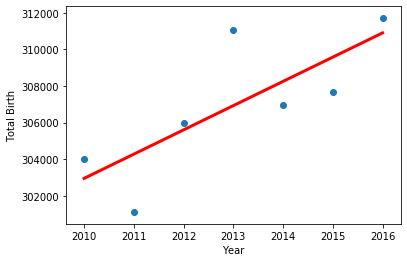

In [22]:
#2.d
q2d = q2[q2.Year >= 2010]
slope, intercept, r_value, p_value, std_err = linregress(q2d['Year'],q2d['Total Birth'])
line = [slope*xi + intercept for xi in q2d['Year']]
plt.xlabel('Year')
plt.ylabel('Total Birth')
plt.plot(q2d['Year'], line, 'r-', linewidth = 3)
plt.scatter(q2d['Year'], q2d['Total Birth'])
plt.show()

In [23]:
#2.e
import numpy as np





In [9]:
#3.a
tfr = pd.read_csv('Datasets/Task A/TFR.csv')

q3 = pd.DataFrame(tfr, columns=['Year','QLD','NT'])
condition2 = q3['QLD']==q3['QLD'].min()
q3a = q3[condition2]
q3a
#The minimum value for TFR recorded in the dataset for QLD is 1.8 and
#it was in 1999, in the same year the TFR value for NT is 2.123

,Year,QLD,NT
28,1999,1.8,2.123


In [10]:
#4.a
deaths = pd.read_csv('Datasets/Task A/Deaths.csv')
q4 = pd.melt(deaths, id_vars = ['Year'], value_vars = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name = 'State')
q4.rename(columns = {'value': 'Deaths'}, inplace = True)
fun1 = {'Deaths':{'Total Death': 'sum'}}
q4 = q4.groupby('Year').agg(fun1)
q4 = q4.reset_index()
q4.columns = q4.columns.droplevel(0)
q4.rename(columns = {'':'Year'}, inplace = True)

q4a = pd.merge(q2,q4, on=['Year'])
q4a

,Year,Total Birth,Total Death
0,1977,226954,111490
1,1978,226359,108059
2,1979,223370,108315
3,1980,223664,106654
4,1981,230920,109429
5,1982,237076,110990
6,1983,241764,112918
7,1984,240544,110887
8,1985,241814,114197
9,1986,239115,116069


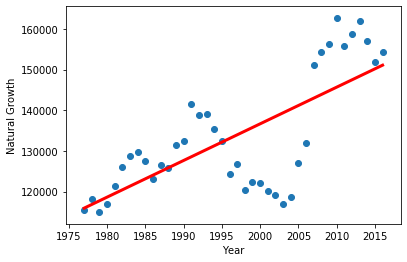

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(q4a['Year'],q4a['Total Birth']-q4a['Total Death'])
line = [slope*xi + intercept for xi in q4a['Year']]
plt.xlabel('Year')
plt.ylabel('Natural Growth')
plt.plot(q4a['Year'], line, 'r-', linewidth = 3)
plt.scatter(q4a['Year'], q4a['Total Birth']-q4a['Total Death'])
plt.show()

## A2

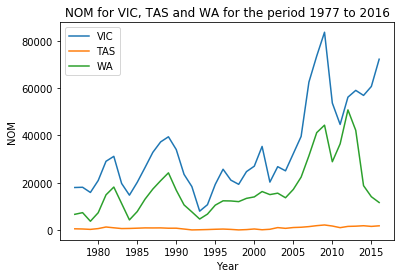

In [12]:
#1.a
nom = pd.read_csv('Datasets/Task A/NOM.csv')
plt.plot(nom.Year, nom.VIC, nom.Year, nom.TAS, nom.Year, nom.WA)
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM for VIC, TAS and WA for the period 1977 to 2016')
plt.legend(['VIC','TAS','WA'], loc='best')
plt.show()

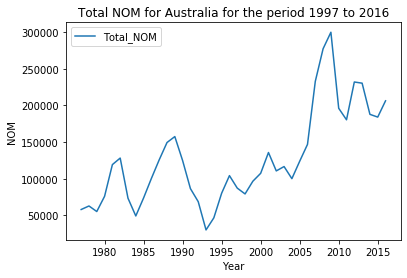

In [13]:
#1.b
a1b = pd.melt(nom, id_vars=['Year'], value_vars=['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'], var_name=['State'])
a1b.rename(columns = {'value': 'NOM'},inplace = True)
fun1 = {'NOM':{'Total_NOM': 'sum'}}
a1b = a1b.groupby('Year').agg(fun1)
a1b = a1b.reset_index()
a1b.columns = a1b.columns.droplevel(0)
a1b.rename(columns = {'':'Year'}, inplace = True)
plt.plot(a1b.Year, a1b.Total_NOM)
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('Total NOM for Australia for the period 1997 to 2016')
plt.legend(['Total_NOM'], loc='best')
plt.show()

In [21]:
#2.a
nim = pd.read_csv('Datasets/Task A/NIM.csv')

nom1 = pd.melt(nom, id_vars = ['Year'], value_vars = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'], var_name = 'State')
nom1.rename(columns = {'value': 'NOM'}, inplace = True)

nim1 = pd.melt(nim, id_vars = ['Year'], value_vars = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'], var_name = 'State')
nim1.rename(columns = {'value': 'NIM'}, inplace = True)

q2a = pd.merge(nom1,nim1, on=['Year','State'])
q2a
#First year is 1977 and last year is 2016

,Year,State,NOM,NIM
0,1977,NSW,25236,-9000
1,1978,NSW,25825,-2000
2,1979,NSW,28086,1500
3,1980,NSW,33499,-2000
4,1981,NSW,47291,-14963
5,1982,NSW,49393,-19584
6,1983,NSW,25740,-17181
7,1984,NSW,20698,-10267
8,1985,NSW,31279,-9328
9,1986,NSW,40922,-12462


In [ ]:
#2.b




In [ ]:
#2.c
slope, intercept, r_value, p_value, std_err = linregress(q2a[''])



plt.show()

#The values of NOM and NIM have similar trends during 1977 and 2016

In [ ]:
#2.d
plt.plot(q2a.Year, q2a.QLD_NIM, q2a.Year, q2a.NSW_NIM)
plt.xlabel('Year')
plt.title('NIM for QLD and NSW over different years')
plt.legend(['QLD_NIM','NSW_NIM'], loc='best')
plt.show()

#The NIM for QLD and NSW have opposite trends

## A3